In [1]:
# Assignment no. 7 - Write a Program to implement random forest for classification.


In [2]:
import pandas as pd
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
data=pd.read_csv('loan_data_set.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.drop('Loan_ID',axis=1,inplace=True)

In [7]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(),inplace=True)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
data['Gender']=data['Gender'].apply(lambda x: 0 if x=='Male' else 1)
data['Married']=data['Married'].apply(lambda x: 0 if x=='No' else 1)
#data['Dependents'].apply(lambda x: 0 if x=='Male' else 1)
data['Education']=data['Education'].apply(lambda x: 0 if x=='Not Graduate' else 1)
data['Self_Employed']=data['Self_Employed'].apply(lambda x: 0 if x=='No' else 1)
data['Loan_Status']=data['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)

def parea(x):
    if x=='Urban':
        return 0
    elif x=='Rural':
        return 1
    else:
        return 2
data['Property_Area']=data['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})

In [10]:
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1
6,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,0,1
7,0,1,3+,1,0,3036,2504.0,158.0,360.0,0.0,2,0
8,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,0,1
9,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0


<AxesSubplot:>

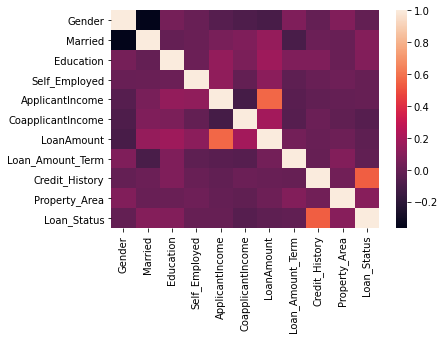

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(data.corr())

In [12]:
data.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,0.045364,0.000525,-0.058809,-0.082912,-0.106904,0.074030,-0.009170,0.082045,-0.017987
Married,-0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.003071,0.091478
Education,0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.168759,0.073928,0.073658,0.003592,0.085884
Self_Employed,0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,0.021996,-0.003700
ApplicantIncome,-0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.007894,-0.004710
CoapplicantIncome,-0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.028356,-0.059187
LoanAmount,-0.106904,0.146546,0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,0.016808,-0.033214
Loan_Amount_Term,0.074030,-0.100912,0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,0.086879,-0.022549
Credit_History,-0.009170,0.010938,0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.030248,0.540556
Property_Area,0.082045,0.003071,0.003592,0.021996,-0.007894,-0.028356,0.016808,0.086879,0.030248,1.000000,0.103253


In [13]:
data=data[['Married','Education','Credit_History','Property_Area','Loan_Status']]
#data

In [14]:
import seaborn as sns
#sns.dist(data)
#data.hist()

In [15]:
coded_data=pd.get_dummies(data,columns=['Married','Education','Credit_History','Property_Area'],drop_first=True)

In [16]:
coded_data

,Loan_Status,Married_1,Education_1,Credit_History_1.0,Property_Area_1,Property_Area_2
0,1,0,1,1,0,0
1,0,1,1,1,1,0
2,1,1,1,1,0,0
3,1,1,0,1,0,0
4,1,0,1,1,0,0
...,...,...,...,...,...,...
609,1,0,1,1,1,0
610,1,1,1,1,1,0
611,1,1,1,1,0,0
612,1,1,1,1,0,0


In [17]:
# TRAIN, TEST SPLIT
from sklearn.model_selection import train_test_split

X=coded_data.drop(['Loan_Status'],axis=1)
y=coded_data['Loan_Status']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [19]:
#Using random forest model

from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=5)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [20]:
rfc_pred = rfc_model.predict(X_test)

In [21]:
#Predictions and Evaluations
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_pred)

In [22]:
cm

array([[ 27,  28],
       [  4, 126]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,rfc_pred))

0.827027027027027


In [24]:
#Conclusion - We successfully implement random forest for classification.